In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import image as tf_image
from tensorflow import io as tf_io
from tensorflow import keras
from PIL import Image

2024-07-15 15:07:48.984219: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading both models without compilation to prevent problems with custom loss function

In [2]:
segmentation_model_v1 = keras.models.load_model('ship_segmentation/ship_segmentation_model.keras', compile=False)
segmentation_model_v2 = keras.models.load_model('ship_segmentation/ship_segmentation_model_v2.keras', compile=False)


## Function for image preprocessing

In [3]:
def preprocess_image(img_path):
    input_img = tf_io.read_file(img_path)
    input_img = tf_io.decode_jpeg(input_img, channels=3)
    input_img = tf_image.resize(input_img, (768, 768))
    input_img = tf_image.convert_image_dtype(input_img, "float32")
    input_img = tf.expand_dims(input_img, axis=0)
    return input_img


## Functions for mask prediction and visualization

In [4]:
def visualize_masks(img_path, seg_mask_v1, seg_mask_v2):
    image = Image.open(img_path)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(seg_mask_v1, cmap='gray')
    plt.title('Model v1 Result')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(seg_mask_v2, cmap='gray')
    plt.title('Model v2 Result')
    plt.axis('off')

    plt.show()


def predict_and_visualize(image_path):
    input_img = preprocess_image(image_path)

    seg_result_v1 = segmentation_model_v1.predict(input_img, verbose=0)
    seg_result_v1 = tf.squeeze(seg_result_v1, axis=0)

    seg_result_v2 = segmentation_model_v2.predict(input_img, verbose=0)
    seg_result_v2 = tf.squeeze(seg_result_v2, axis=0)

    visualize_masks(image_path, seg_result_v1, seg_result_v2)

## Loading images: you can use images that I collected for this project or your own

In [5]:
test_img_dir = 'test_imgs'
test_img_list = sorted(os.listdir(test_img_dir))

# test_img_dir = '/Users/maxim/airbus-ship-detection/test_v2'
# test_img_list = sorted(os.listdir(test_img_dir))[160:180]


## And finally, testing of model predictions

Processing image 0215745f1.jpg...


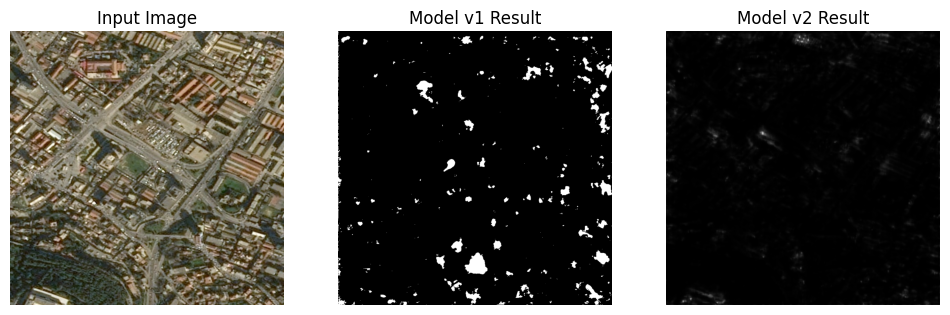

Processing image 022bdce45.jpg...


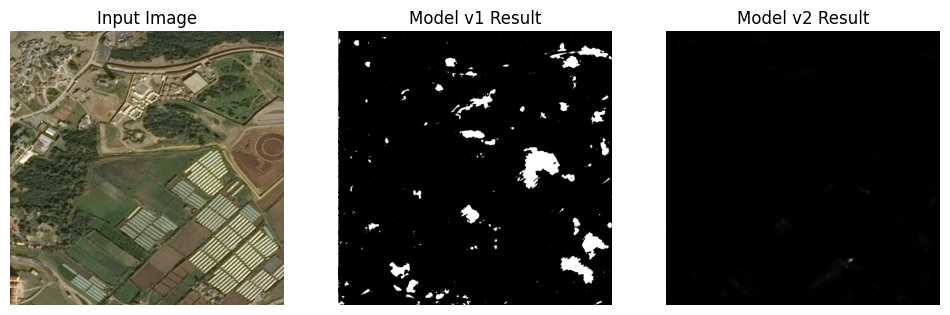

Processing image 02338da73.jpg...


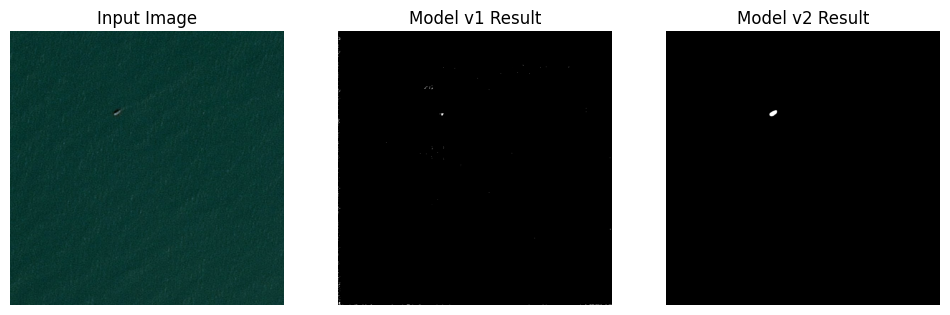

Processing image 023ff53b7.jpg...


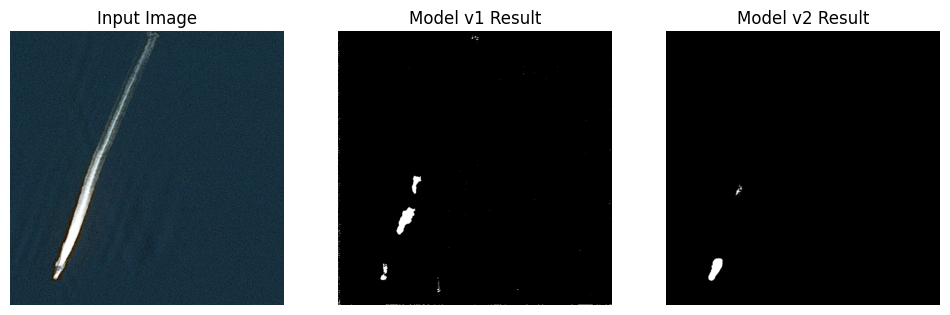

Processing image 0243df8bd.jpg...


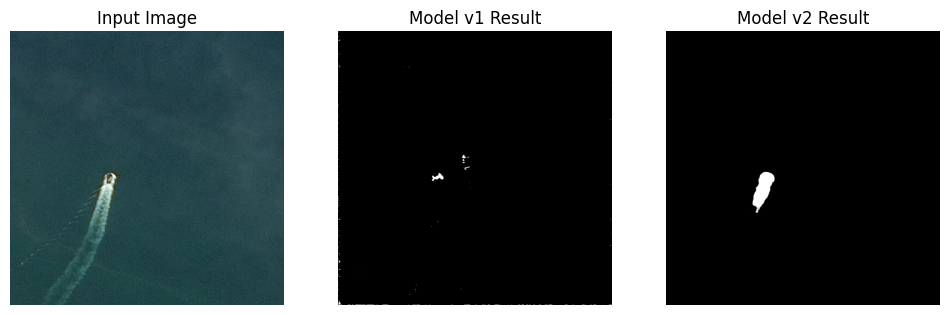

Processing image 02483d339.jpg...


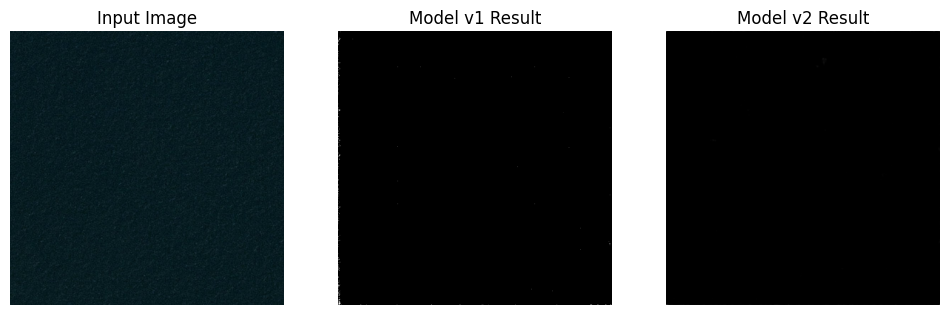

Processing image 024cc6ce2.jpg...


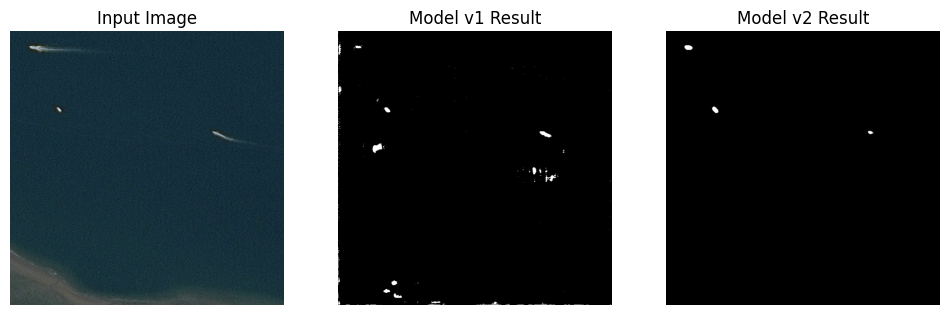

Processing image 02508c1c7.jpg...


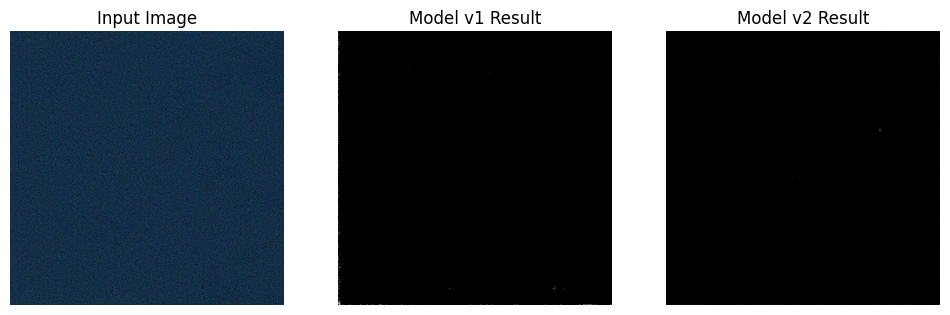

Processing image 026ba9e60.jpg...


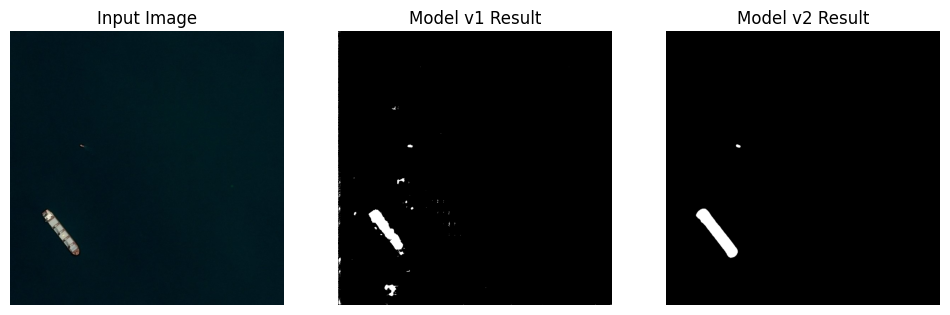

Processing image 02701995b.jpg...


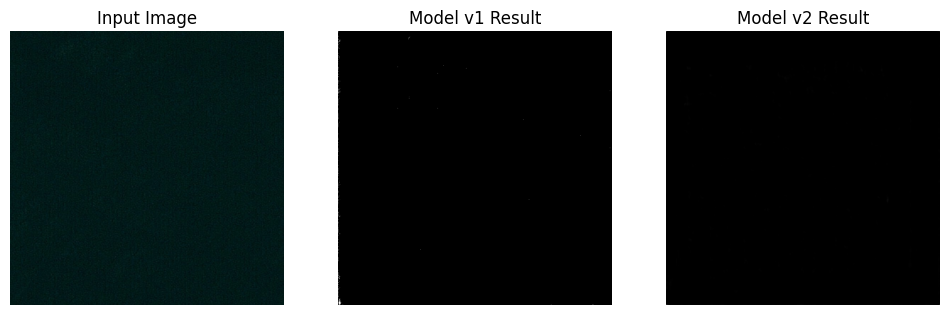

In [6]:
for image_id in test_img_list:
    print('Processing image {}...'.format(image_id))
    
    full_path = os.path.join(test_img_dir, image_id)
    predict_and_visualize(full_path)

As you can see second version of model has much better performance on images without ships and also more accurate on other pictures.